In [1]:
from langgraph.graph import StateGraph, START,END
from typing import TypedDict

In [ ]:
class batsmanState(TypedDict):
    runs:int
    ball:int
    fours:int 
    sixes:int

    sr:float
    bbp:float
    boundary_percent:float
    summary:str

In [54]:
def cal_sr(state:batsmanState)->batsmanState:
    sr=(state['runs']/state['ball'])*100
 
    return {'sr':sr}

In [ ]:
def calbpb(state:batsmanState)->batsmanState:
    bbp=state['ball']/state['fours']+state['sixes']
    
    return {'bbp':bbp}

In [47]:
def cal_boundp(state:batsmanState)->batsmanState:
    boundary_percent=(((state['fours']*4)+(state['sixes']*6))/state['runs'])*100
    
    return {'boundary_percent':boundary_percent}

In [48]:
def summary(state:batsmanState)->batsmanState:
    summary=f"""
Strike Rate-{state['sr']}\n
Balls per boundary-{state['bbp']} \n 
Boundary Percent-{state['boundary_percent']}\n
""" 
    state['summary']=summary
    return {'summary':summary}

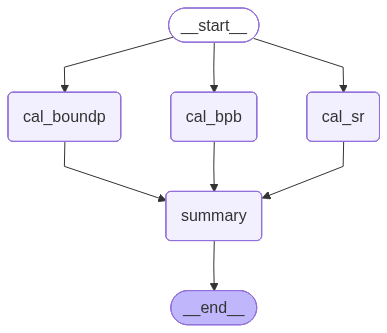

In [49]:
graph=StateGraph(batsmanState)
graph.add_node('cal_sr',cal_sr)
graph.add_node('cal_bpb',calbpb)
graph.add_node('cal_boundp',cal_boundp)
graph.add_node('summary',summary)
# add edges
graph.add_edge(START,'cal_sr')
graph.add_edge(START,'cal_boundp')
graph.add_edge(START,'cal_bpb')
graph.add_edge('cal_sr','summary')
graph.add_edge('cal_boundp','summary')
graph.add_edge('cal_bpb','summary')
graph.add_edge('summary',END)
graph.compile()

In [50]:
workflow=graph.compile()

In [55]:
initial_state={
    'runs':100,
    'ball':50,
    'fours':6,
    'sixes':4
}
workflow.invoke(initial_state)

{'runs': 100,
 'ball': 50,
 'fours': 6,
 'sixes': 4,
 'sr': 0.02,
 'bbp': 12.333333333333334,
 'boundary_percent': 48.0}